# Matched Pairs $t$-Test

The levels of stress were measured in the 2nd week of classes and at midterms to determine if stress levels were higher at midterm. We will test using matched pairs the variables **Stress1** and **Stress2** from the *personality* data set. The research question a data here are very similar to a

<center><b><span style="color: purple" >pretest vs. posttest</span></b></center>

design, the quintessential matched pairs setup.

## Setup

As it happens, we will end up using a 1 sample $t$-test. Why? We create a **gain score** from the pretest and posttest data as follows:

$$\text{gain} = \text{post} - \text{pre}$$

Then, we use single sample methods on the gains. The hypotheses will be similar to the following:

$$\begin{align}H_0 &: \mu_g = 0 \\H_a &: \mu_g > 0 \end{align}$$

where $\mu_g$ indicates the average **gain score** for the sample. In the example above, we are expecting positive gains where the posttest scores, on average, are higher than the pretest scores. In some experiments, we plan for the opposite, as when a pharmaceutical drug for high cholesterol is being tested. In that case, we would expect the alternative hypothesis to be more like

$$H_a : \mu_g < 0$$

where the scores on the posttest are lower than the pretest scores.

## Example: Stress

Let's load the 2 vectors we will need. Due to the similiarity to a pre vs. post setup, we will call the 2 vectors **pre** and **post**.

In [1]:
pers <- read.csv('http://faculty.ung.edu/rsinn/data/personality.csv')
head(pers, 3)

Age,Yr,Sex,G21,Corps,Res,Greek,VarsAth,Honor,GPA,...,Perf,OCD,Play,Extro,Narc,HSAF,HSSE,HSAG,HSSD,PHS
21,2,M,Y,Y,1,N,N,N,3.23,...,105,10,142,8,11,41,40,26,27,SE
20,3,F,N,N,2,Y,N,Y,3.95,...,105,3,172,16,11,46,52,26,33,SE
22,3,M,Y,N,2,N,N,N,3.06,...,73,1,134,15,11,48,42,44,29,AG


In [2]:
pre <- pers[ , 'Stress1']
post <- pers[ , 'Stress2']

We now need to create the gain score vector which will be used as our 1 sample for this test.

In [3]:
gain <- post - pre
head(gain,5)

[1] -5 -2  7  7 12

Notice that the first two values are negative indicating that these two participants scored lower on the posttest than they did on the pretest. The positive scores displayed in items 3 - 5 in this vector represent participants who appear to have benefitted from new labs.

### The Normality Assumption

```{sidebar} Height of Plots
Allowing R to use its default settings for the **layout()** function results in the aspect ratio of the plots to become distorted. In this case, the plots are too narrow to analyze properly. Instead, we set "height = lcm(12)" to produce plots with better aspect ratios. This value often works, but a trial and error process leads us to graphics that are appropriate.
```

As with Independent Samples, we will construct a stem plot and box plot hoping to see evdience of the data being drawn from an approximately normal distribution but with no outliers present. The data are all integers which explains why, in the stem plot, every value to right of the bar is a zero. Note that the overall shape provides reasonably good evidence that the data were in fact sampled from a normal distribution.

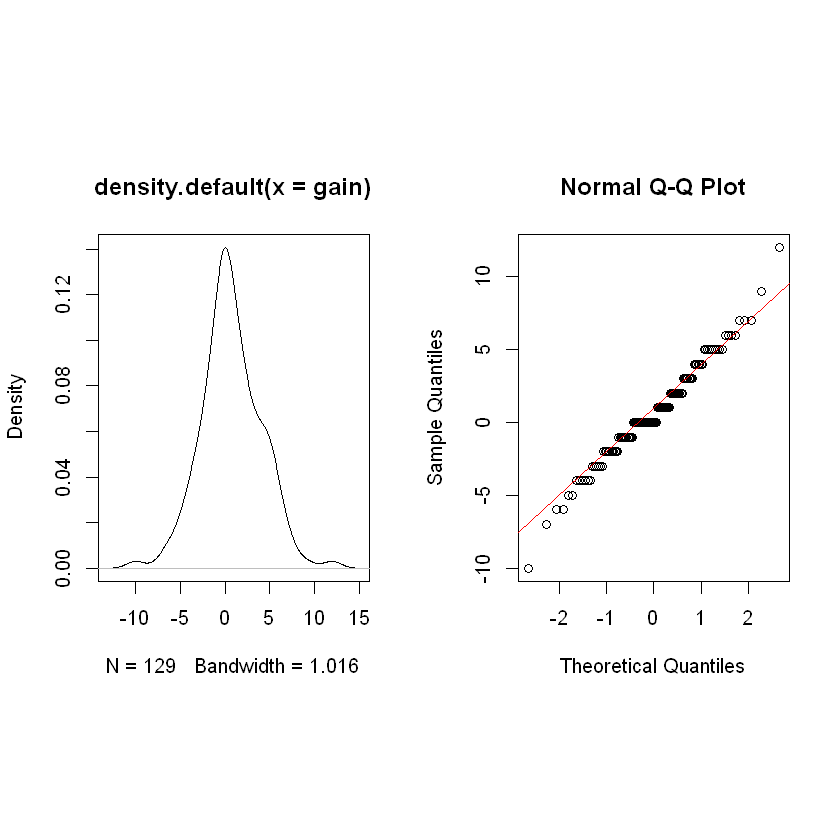

In [4]:
layout(matrix(c(1,2), ncol = 2), height = lcm(12))
plot(density(gain))
plot2 <- { qqnorm(gain)
qqline(gain, col = 'red') }

### Analysis of the Assumptions

The **normality** assumption is easily verified by inspecting the QQ plot which is very good and by inspecting the density plot which provides solid evidence the data were drawn from a normal distribution. These data are appropriate for $t$ procedures.

### Hypotheses

The research question asks if students experience heightened stress levels at midterms which leads to the following setup:

$$\begin{align}H_0 &: \mu_g = 0\\H_a &: \mu_g > 0 \end{align}$$

### Conducting the Test

Notice that this is a straightforward 1 sample $t$-test

In [5]:
t.test(gain)


	One Sample t-test

data:  gain
t = 2.4481, df = 128, p-value = 0.01572
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.1382394 1.3036210
sample estimates:
mean of x 
0.7209302 


### Reporting Out

Since $p = 0.01572 < 0.05 = \alpha$, we reject the null. We thus have evidence that the gain scores were indeed positive and that the new labs, on average, produced students who better understood the material in the chemistry course.

### **Not** an Independent Samples $t$-Test

While we could, in fact, conduct a standard independent samples $t$-test on the pretest and posttest data, this approach is **not correct**. Let's perform the 2 sample test.

In [6]:
t.test(post, pre, matched = TRUE)


	Welch Two Sample t-test

data:  post and pre
t = 1.7118, df = 255.52, p-value = 0.08814
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.1084227  1.5502831
sample estimates:
mean of x mean of y 
 13.82171  13.10078 


Notice that the $p$-value is not only different but more than 5 times larger than the $p$-value from the correct matched pairs test.

```{warning}
The matched pairs $t$-test is a more powerful statistical test than the independent samples $t$-test. Thus, matched pairs should be used in every case for which it is appropriate.
```

If we always use matched pairs when appropriate, our results and $p$-values will be have a higher degree of correctness.

## Example 2

Does yoga help patients struggling with back pain? Patients registered their ability to perform common household tasks like laundry, cooking and clearning on a 5 point scale. A 10-week yoga program was then launched geared toward helping these adults heal. Test the efficacy of the yoga intervention at the $\alpha = 0.05$ level.

<table style="width:100%">
  <tr>
    <th>Before</th><td>1.7</td><td>3.1</td><td>3.0</td><td>3.0</td><td>1.3</td><td>2.7</td><td>1.7</td><td>1.2</td><td>2.9</td><td>3.4</td><td>1.6</td><td>2.8</td>
  </tr>
  <tr><th>After</th><td>1.4</td><td>2.6</td><td>2.0</td><td>2.4</td><td>1.5</td><td>0.9</td><td>3.0</td><td>3.2</td><td>3.4</td><td>3.5</td><td>4.0</td><td>4.9</td>
  </tr>
</table>

### Normality and Homogeneity Assumptions

Let's load the data from the table into vectors in R so we can create a vector of gain scores for analysis.

In [7]:
before = c(1.7, 3.1, 3.0, 3.0, 1.3, 2.7, 1.9, 1.2, 2.9, 3.4, 2.3, 3.5)
after = c(1.4, 2.6, 2.0, 2.4, 1.5, 1.1, 3.0, 3.2, 2.8, 3.5, 3.1, 4.9)
gain = after - before

In [8]:
stem(gain)


  The decimal point is at the |

  -1 | 60
  -0 | 6531
   0 | 128
   1 | 14
   2 | 0



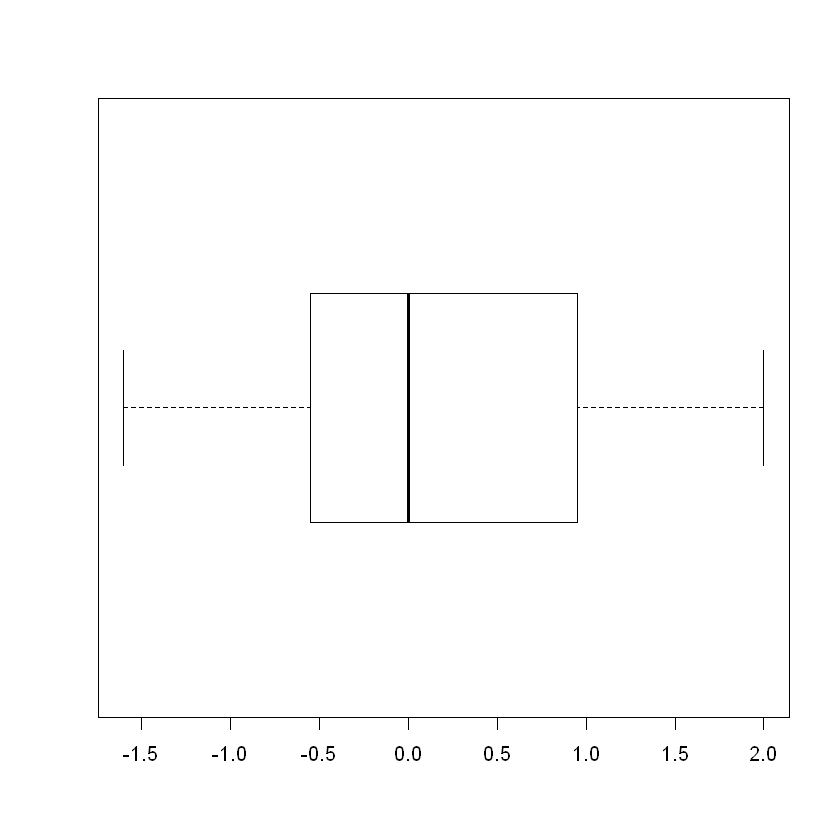

In [9]:
boxplot(gain, horizontal = T, height = lcm(5))

#### Analysis

With no outliers present and reasonable evidence the gain scores were drawn from a bell-shaped distribution, the normality assumption is verified. There is no way to assess the homogeneity assumption given that we have only one small sample. The data will work well for $t$ procedures.

### Hypotheses

$$\begin{align}H_0 &: \mu_g =  0\\H_a &: \mu_g >  0\end{align}$$

### Conducting the Test

In [10]:
t.test(gain, alternative = 'greater')


	One Sample t-test

data:  gain
t = 0.41557, df = 11, p-value = 0.3429
alternative hypothesis: true mean is greater than 0
95 percent confidence interval:
 -0.4151808        Inf
sample estimates:
mean of x 
    0.125 


### Reporting Out

Since $p = 0.343 > 0.05 = \alpha$, we fail to reject the null hypothesis. We have no evidence the yoga helped improve these patient's ability to perform household chores.